# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [1]:
import os
import pandas as pd

In [2]:
x=[]
      
for n in range(1995,2018):
    if n<2000:
        skip=3
    else:
        skip=2
    filename='Precio_Bolsa_Nacional_($kwh)_'+str(n)
    if n>= 2016:
        filename+='.xls'
    else:
        filename+='.xlsx'
        
    y=pd.read_excel(filename,skiprows=skip,parse_cols=24)
    x.append(y)

z=pd.concat(x)

len(z)
index=list(range(0,len(z)))
z.index = index


**2.--** Compute e imprima el número de registros con datos faltantes.

In [3]:
r=len(z)-len(z.dropna())
r

28

**3.--** Compute e imprima el número de registros duplicados.

In [4]:
m=z[z.duplicated()]
len(m)

67

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [5]:
#print(len(z))
m2=z.dropna()
#print(len(m2))
m3=m2.drop_duplicates()
print(len(m3))

7875


**5.--** Compute y grafique el precio primedio diario.

C:\Users\Sarita\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sarita\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sarita\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

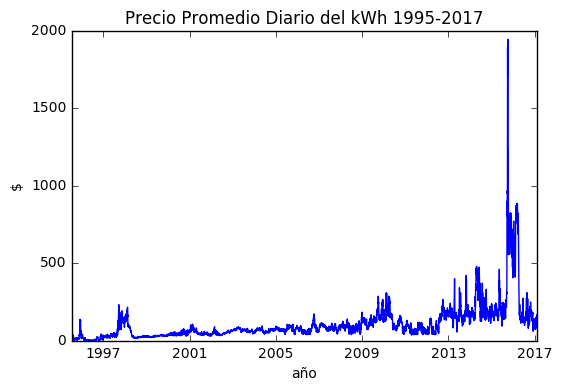

In [6]:
#Precio promedio diario

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

m4=m3
m4['mean']=m3.mean(axis=1)

st=pd.to_datetime(m3['Fecha'],infer_datetime_format=True)
m4['Fecha']=st
m4['dia']=st.dt.dayofweek
m4['mes']=st.dt.month
m4['año']=st.dt.year



plt.plot(m4['Fecha'],m4['mean'],)
plt.ylabel('$')
plt.xlabel('año')
plt.title('Precio Promedio Diario del kWh 1995-2017')
plt.show()


**6.--** Compute y grafique el precio máximo por mes.

In [7]:
w = []
m5=m4
for n in range(len(m3['Fecha'])):
    w.append(str(m3.iloc[n,0])[0:7])

m5['key']=w


C:\Users\Sarita\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\Users\Sarita\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


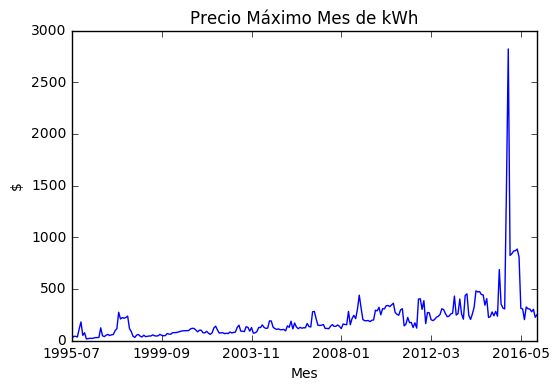

In [8]:
#Precio Máximo del mes

%matplotlib inline
y=list(m4.axes[1])
m5['max']=m4[y[1:25]].apply(max,axis=1)
b=m5.groupby('key').max()['max']
b.plot()
plt.ylabel('$')
plt.xlabel('Mes')
plt.title('Precio Máximo Mes de kWh')

**7.--** Compute y grafique el precio mínimo mensual.

C:\Users\Sarita\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


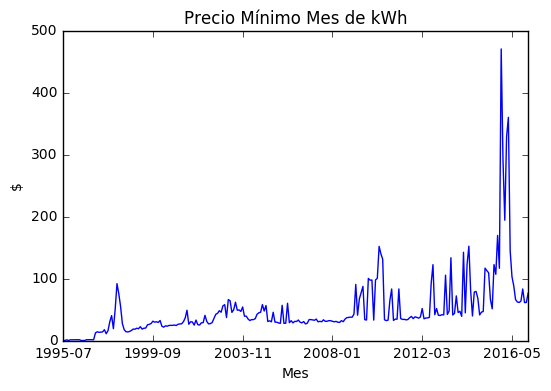

In [9]:
#Precio minimo mensual

%matplotlib inline
m6=m5
y=list(m4.axes[1])
m6['min']=m4[y[1:25]].apply(min,axis=1)
b3=m6.groupby('key').min()['min']
b3.plot()
plt.ylabel('$')
plt.xlabel('Mes')
plt.title('Precio Mínimo Mes de kWh')

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

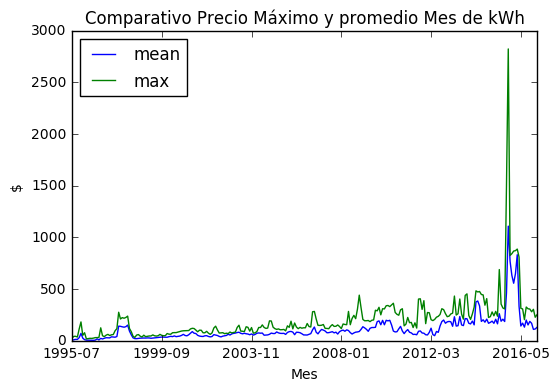

In [10]:
#Precio máximo del mes y precio promedio mensual

b4=m6.groupby('key').mean()['mean']

plt.figure()
b4.plot(legend='mean')
b.plot(legend='max')
plt.ylabel('$')
plt.xlabel('Mes')
plt.title('Comparativo Precio Máximo y promedio Mes de kWh')

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

C:\Users\Sarita\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sarita\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


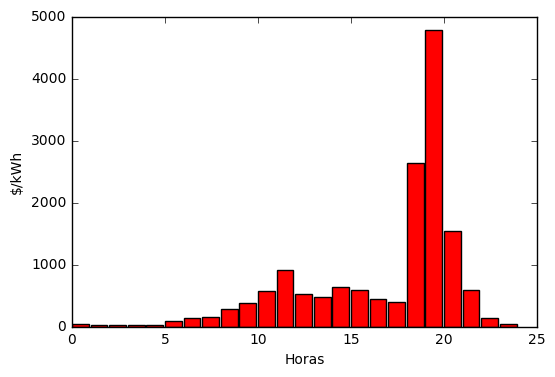

In [11]:
#Histograma de horas con precio máximo días laborales


%matplotlib inline

import numpy as np

from datetime import datetime, date, time, timedelta
import calendar

fecha=[]
fecha=m6['Fecha']
m6['Fecha']=pd.to_datetime(m6['Fecha'], format="%Y-%m-%d")
m6['Dia']=m6['Fecha'].dt.weekday_name

Lab = m6['Dia'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
Lab = m6[Lab]
indicador = ['{}'.format(n) for n in range(len(Lab))]
Lab.index = indicador

t=[]                                
for n in range(len(Lab)):
    x = pd.Series(Lab.loc[str(n)]).values[1:25]
    t.append ([i for i, e in enumerate(x) if e == max(x)])
    a=[]                     
for n in range(len(t)):
    for i in range (len(t[n])):
        a.append(t[n][i])
rep=[]    


for n in range (24):
    rep.append(a.count(n))
plt.xlabel("Horas")
plt.ylabel("$/kWh")
plt.bar(range(24),rep,color='r',width = 0.9)
plt.show()


**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

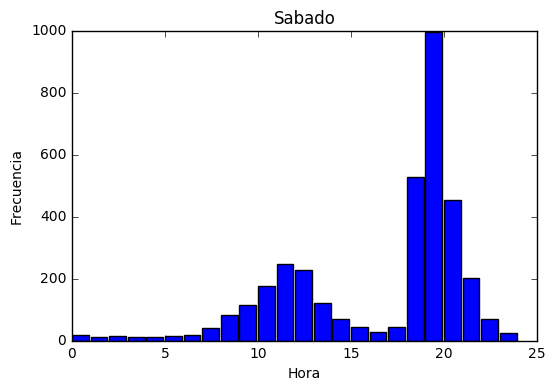

In [12]:
#Histograma de horas con precio máximo día Sabado

Sab = m6['Dia'].isin(['Saturday'])
Sab = m6[Sab]

indicador = ['{}'.format(n) for n in range(len(Sab))]
Sab.index = indicador
 

s=[]                               
for n in range(len(Sab)):
    x = pd.Series(Sab.loc[str(n)]).values[1:25]
    s.append ([i for i, e in enumerate(x) if e == max(x)])
    
    a=[]                     
for n in range(len(s)):
    for i in range (len(s[n])):
        a.append(s[n][i])
rep=[]    

for n in range (24):
    rep.append(a.count(n))
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.title('Sabado')
plt.bar(range(24),rep,color='blue',width = 0.9)
plt.show()


**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

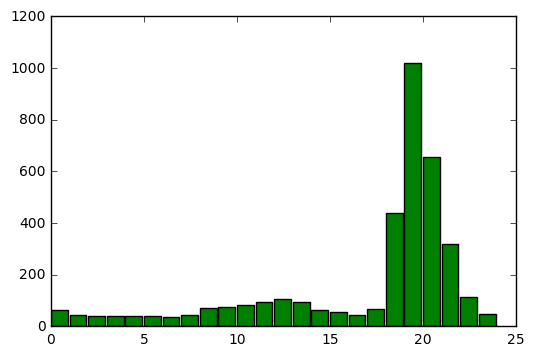

In [13]:
#Histograma de horas con precio máximo día Domingo

Sun = m6['Dia'].isin(['Sunday'])
Sun = m6[Sun]

indicador = ['{}'.format(n) for n in range(len(Sun))]
Sun.index = indicador
 

s=[]                                
for n in range(len(Sun)):
    x = pd.Series(Sun.loc[str(n)]).values[1:25]
    s.append ([i for i, e in enumerate(x) if e == max(x)])
    
    a=[]                     # Este Fragmento hace una matriz de la matriz u que contenia horas en que el maximo se repetia.
for n in range(len(s)):
    for i in range (len(s[n])):
        a.append(s[n][i])
rep=[]    

for n in range (24):
    rep.append(a.count(n))
plt.bar(range(24),rep,color='g',width = 0.9)
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [14]:
#Matriz con valores mínimos anuales - Se eliminaron los datos de Cero ya que este precio no es lógico
matrizSinCero = m6[m6>0].dropna()
Agrupac=matrizSinCero.groupby('año')['min'].idxmin()
ValorMinAnio=matrizSinCero.loc[Agrupac]
ValorMinAnio.filter(['año','Fecha','min'], axis=1)


,año,Fecha,min
3,1995,1995-07-23,0.100000
296,1996,1996-05-11,1.000000
738,1997,1997-07-15,10.882310
1097,1998,1998-07-09,13.847330
1381,1999,1999-03-28,18.359530
1753,2000,2000-03-25,21.531167
2346,2001,2001-11-08,24.978128
2509,2002,2002-04-20,26.777682
2809,2003,2003-02-14,37.013438
3271,2004,2004-05-21,33.703606


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

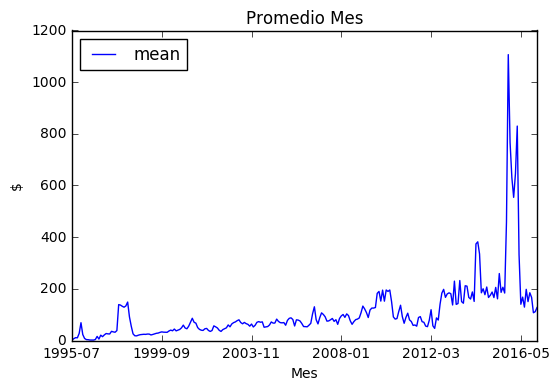

In [15]:
# Precio promedio mensual

b4=m6.groupby('key').mean()['mean']

plt.figure()
b4.plot(legend='promMes')
plt.show
plt.ylabel('$')
plt.xlabel('Mes')
plt.title('Promedio Mes')


plt.show()

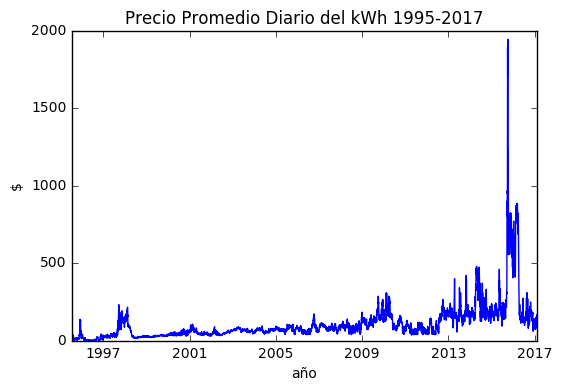

In [16]:
# precio promedio diario

plt.plot(m4['Fecha'],m4['mean'],)
plt.ylabel('$')
plt.xlabel('año')
plt.title('Precio Promedio Diario del kWh 1995-2017')
plt.show()

---